In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ddddddddd/data.yaml


In [22]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("school-oylla").project("cel-bodies")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.195, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to cel-bodies-1 in yolov8:: 100%|██████████| 1086/1086 [00:00<00:00, 4734.51it/s]


In [4]:
%pip install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 14.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [6]:
train_images = "/kaggle/working/cel-bodies-1/train/images"
train_labels = "/kaggle/working/cel-bodies-1/train/labels"

val_images = "/kaggle/working/cel-bodies-1/valid/images"
val_labels = "/kaggle/working/cel-bodies-1/valid/labels"

test_images = "/kaggle/working/cel-bodies-1/test/images"
test_labels = "/kaggle/working/cel-bodies-1/test/labels"

In [7]:
train_data_description = os.listdir(train_images)

train_image_file_paths = [os.path.join(train_images,i) for i in train_data_description if '.jpg' in i]
len(train_image_file_paths)

464

In [8]:
val_data_description = os.listdir(val_images)

val_image_file_paths = [os.path.join(val_images,i) for i in val_data_description if '.jpg' in i]
len(val_image_file_paths)

50

In [9]:
train_data_description = os.listdir(test_images)

train_image_file_paths = [os.path.join(test_images,i) for i in train_data_description if '.jpg' in i]
len(train_image_file_paths)

23

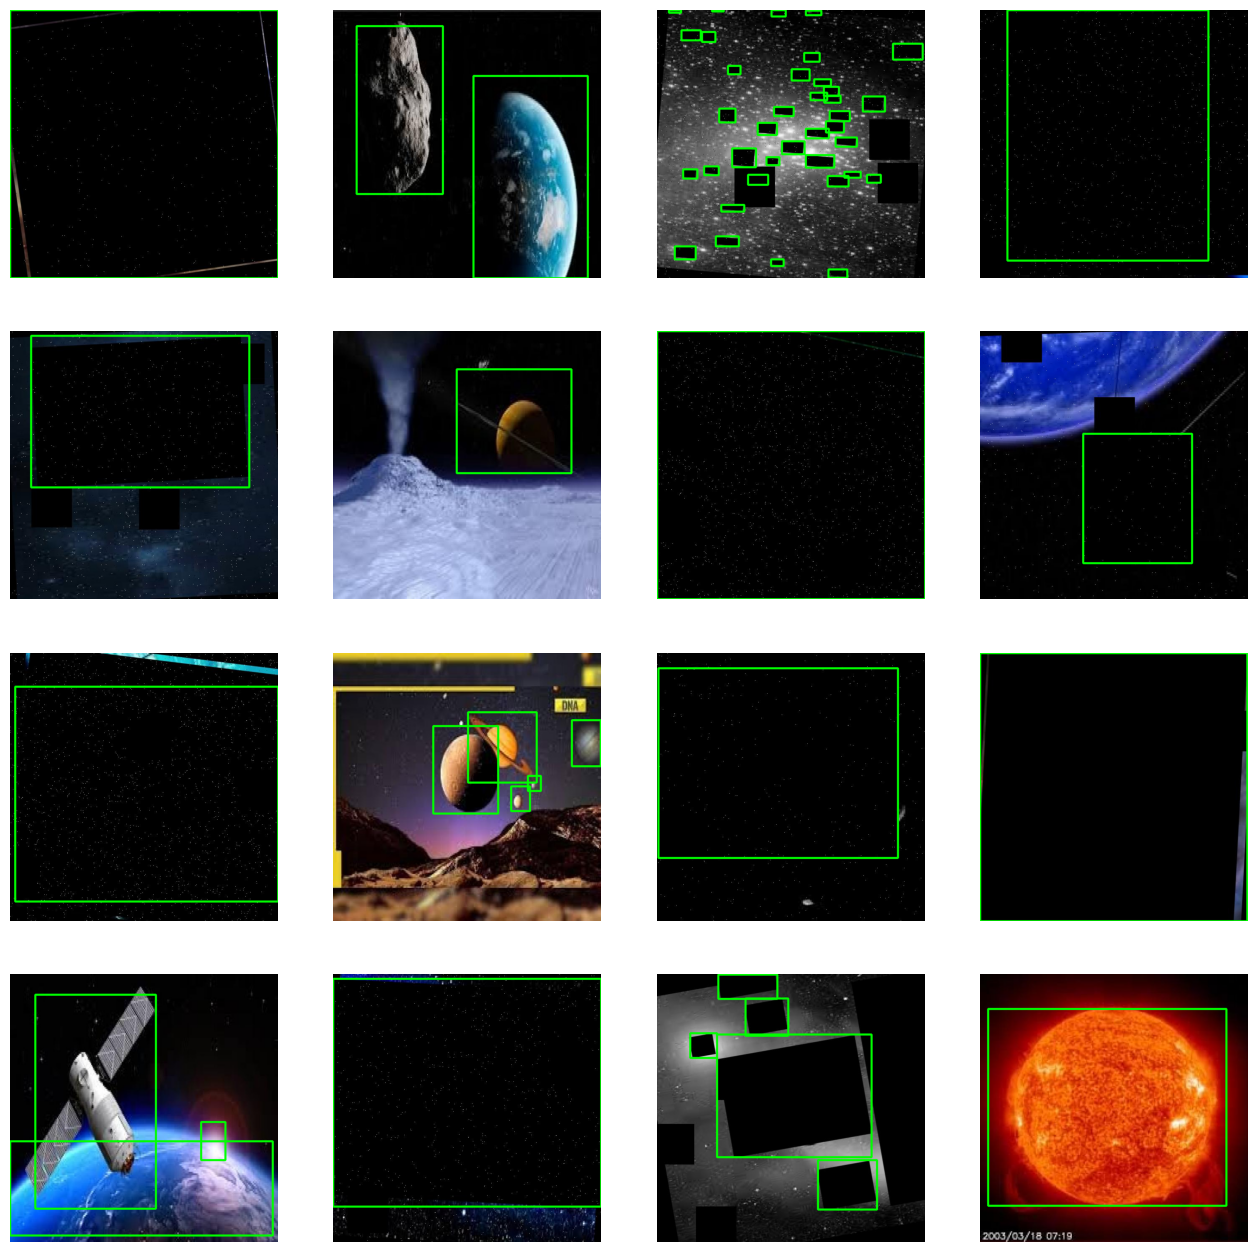

In [10]:
# Get training images dir
image_files = os.listdir(train_images)

random_images = random.sample(image_files, 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    
    # Loop over the labels
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

     #show
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [11]:
image = cv2.imread("/kaggle/working/cel-bodies-1/train/images/plt-63-_jpg.rf.ecf96bb9d90b5aa08a2d79e09f994b70.jpg")

height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


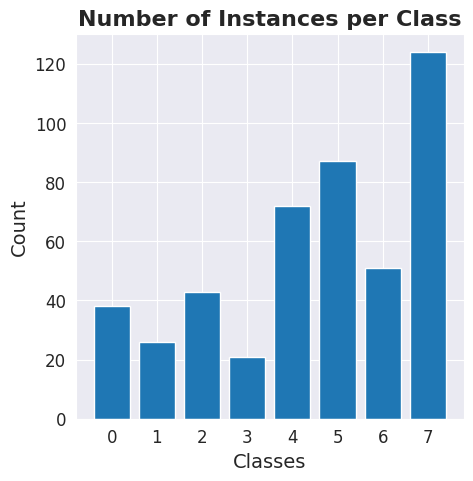

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

train_images = "/kaggle/working/cel-bodies-1/train/images"
train_labels = "/kaggle/working/cel-bodies-1/train/labels"

image_files = os.listdir(train_images)

class_counts = {}

for image_file in image_files:
    # Load the image
    image_path = os.path.join(train_images, image_file)

    # Load labels for image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")[0].split()

    if len(labels) != 5:
        continue

    class_id = int(labels[0])
#         print(class_id)
    class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Extract labels, counts from the dictionary

class_labels = []
class_counts_list = []
for class_id, count in class_counts.items():
    class_labels.append(class_id)
    class_counts_list.append(count)

plt.figure(figsize=(5, 5))

plt.bar(class_labels, class_counts_list)
plt.title("Number of Instances per Class", fontweight="bold", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

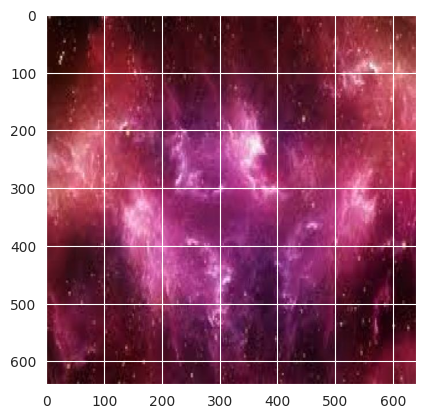

In [13]:
plt.imshow(cv2.imread(image_path))


In [14]:
class_counts_list


[26, 38, 124, 72, 51, 87, 43, 21]

In [23]:
model = YOLO('yolov8x.pt')

model.train(data = '/kaggle/input/ddddddddd/data.yaml',
            epochs = 50,
            imgsz = height,
            seed = 42,
            #patience=5,
            #save=True,
            batch = 15,
            workers = 4)

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/ddddddddd/data.yaml, epochs=50, patience=50, batch=15, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /kaggle/working/cel-bodies-1/train/labels.cache... 464 images, 2 backgrounds, 0 corrupt: 100%|██████████| 464/464 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 98, len(boxes) = 1734. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/cel-bodies-1/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 139. To resolve this only boxes will be used and all se

lr/pg0,▃▅█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▅█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▅█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▁▁▁▁▁▃▄▅▃▄▅▅▆▆▆▆▆▅▇▅▇▆▇▆▇▆▆▆▇▇▇▇▇▇▇▇██
metrics/mAP50-95(B),▁▁▁▁▁▁▁▃▄▅▂▄▅▅▆▆▆▆▅▅▆▆▇▆▇▆▇▇▆▆▇▇▇▇▇▇▇▇██
metrics/precision(B),▂▁▁▁▁▁▆▅▇▆▆▆▅▇▇▇▆▃▇▇▄▄▅▄▃▇▃▃▃▃█▄▇▆▄▅▄▃▄▄
metrics/recall(B),▃█▁▁▃▄▁▃▃▄▃▃▅▄▄▄▃▆▅▄▆▆▆▆▇▃▇▇█▇▃▇▄▅▆▆██▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▇██▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▃▄▄▃▃▄▃▃▂▃▂▂▃▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef1d888bc10>
fitness: 0.1689271364898363
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([   0.044786,    0.076663,     0.17654,   0.0012931,     0.39968,     0.29181,    0.032364,     0.22085])
names: {0: 'asteroid', 1: 'black-hole', 2: 'galaxy', 3: 'meteoroid', 4: 'nebula', 5: 'planet', 6: 'satellite', 7: 'sun-star'}
plot: True
results_dict: {'metrics/precision(B)': 0.3354408458074636, 'metrics/recall(B)': 0.3910714285714286, 'metrics/mAP50(B)': 0.28977674836005807, 'metrics/mAP50-95(B)': 0.15549940183758942, 'fitness': 0.1689271364898363}
save_dir: PosixPath('runs/detect/train2')
speed: {'preprocess': 0.16210079193115234, 'inference': 31.593670845031735, 'loss': 0.0012159347534179688, 'postprocess': 

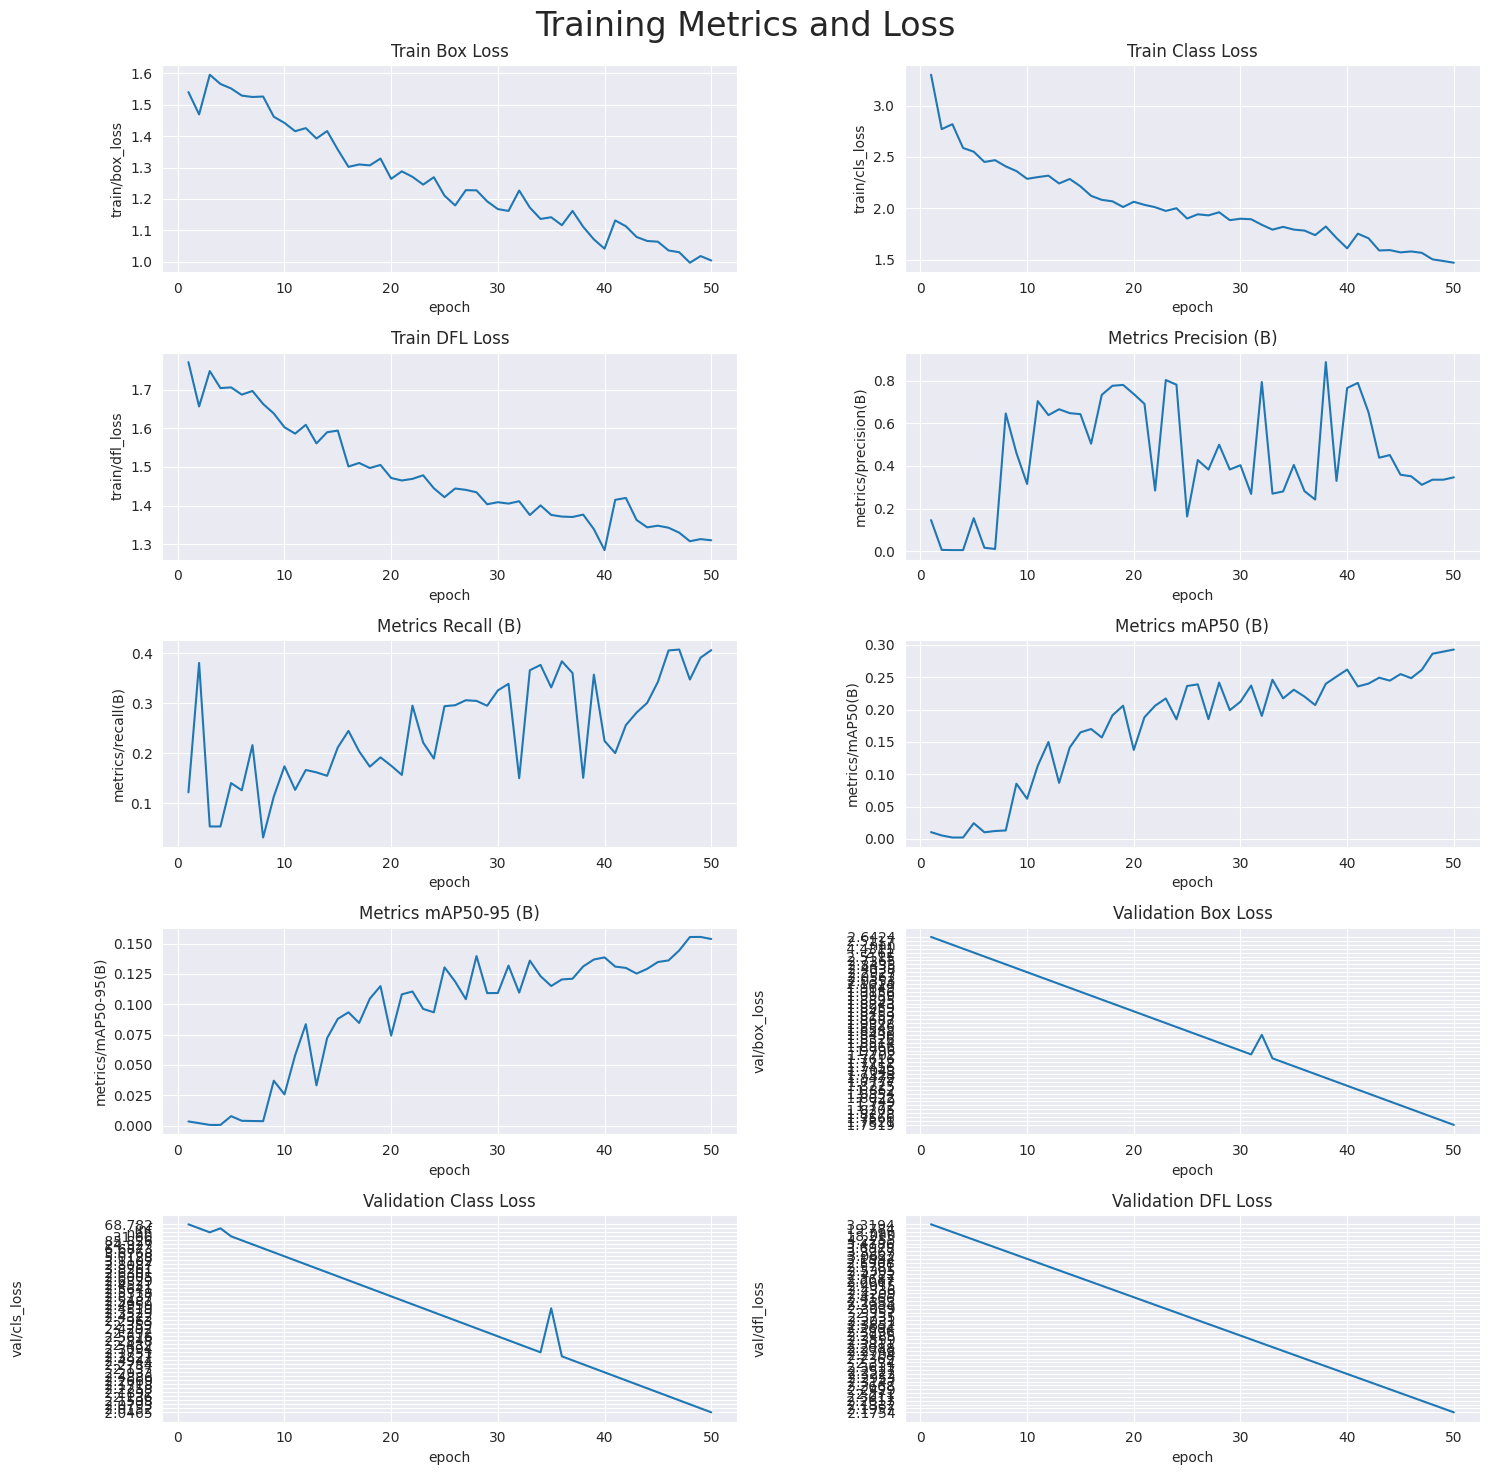

In [24]:
%matplotlib inline

df = pd.read_csv('/kaggle/working/runs/detect/train2/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])

sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])

sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])



axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')

axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')

axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()

plt.show()

In [25]:
%matplotlib inline
#/kaggle/working/runs/detect/train13

#'/kaggle/working/runs/detect/train/weights/best.pt'
model = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')

metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68131272 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /kaggle/working/cel-bodies-1/test/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8, len(boxes) = 57. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]
                   all         23         57      0.279      0.191       0.25      0.202
              asteroid         23          3          0          0          0          0
                galaxy         23          3          1      0.333      0.667        0.6
           

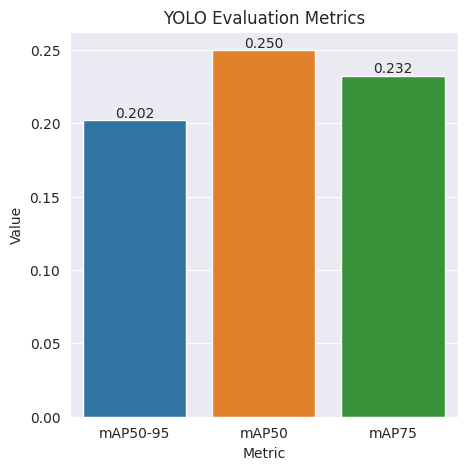

In [26]:
%matplotlib inline

ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

fig = plt.gcf()
fig.set_size_inches(5, 5)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()

In [27]:
def img_detect(img_path):
    
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 640x640 1 planet, 37.0ms
Speed: 3.9ms preprocess, 37.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 nebula, 2 sun-stars, 36.6ms
Speed: 2.4ms preprocess, 36.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 36.7ms
Speed: 3.4ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 nebula, 34.5ms
Speed: 3.4ms preprocess, 34.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 34.3ms
Speed: 3.4ms preprocess, 34.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 nebula, 2 planets, 33.4ms
Speed: 3.4ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sun-stars, 33.8ms
Speed: 3.8ms preprocess, 33.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 nebula, 33.6ms
Speed: 3.4ms preprocess, 33.6ms inference, 1.4ms

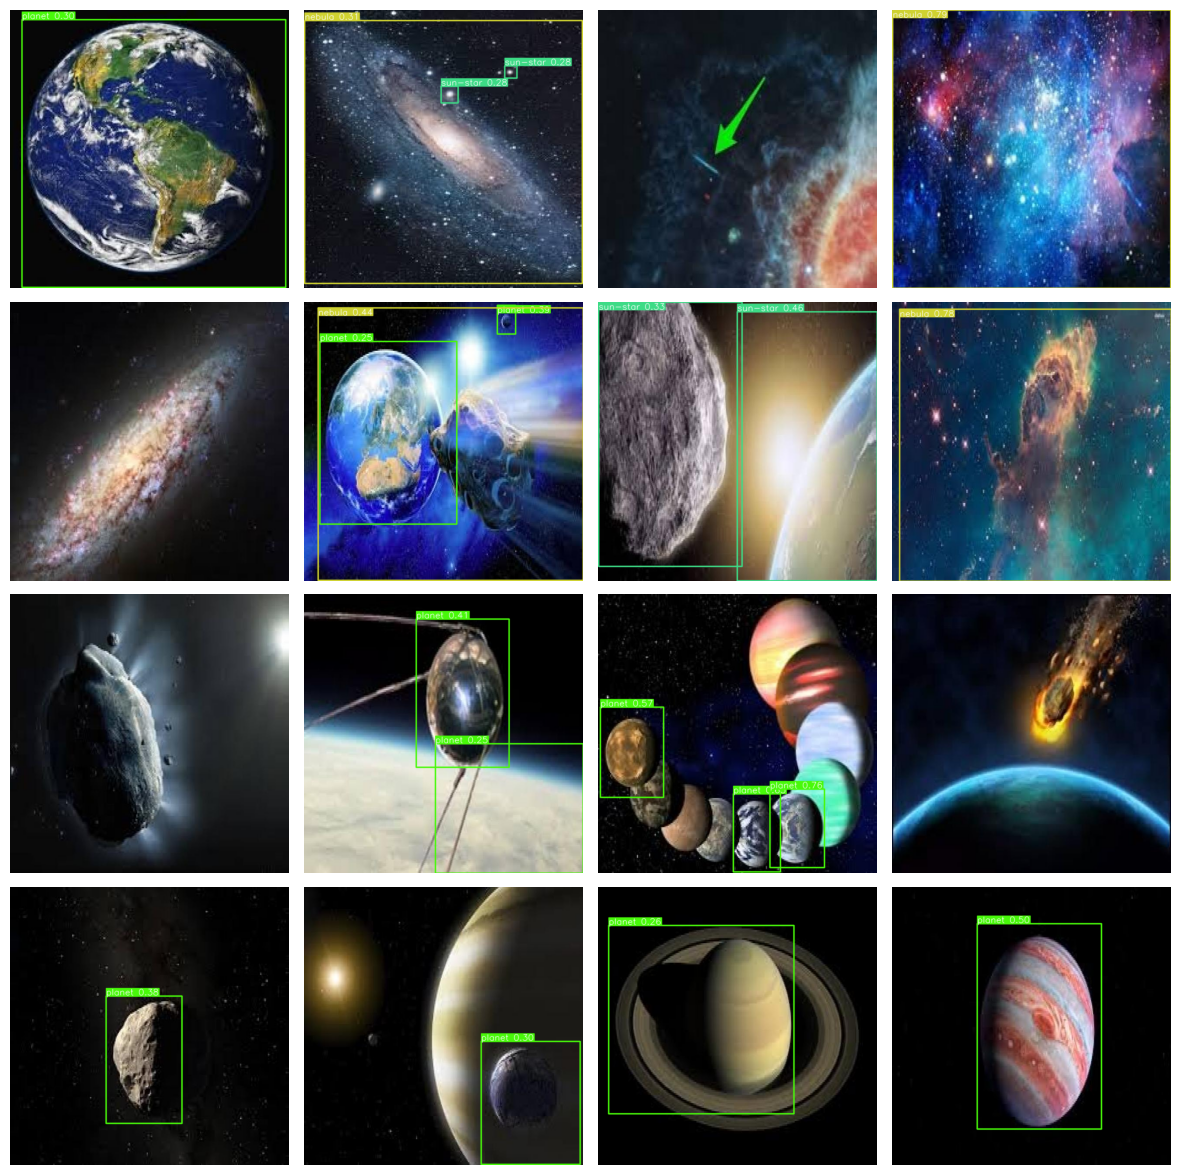

In [28]:
import random
custom_image_dir = '/kaggle/working/cel-bodies-1/test/images'

image_files = os.listdir(custom_image_dir)
selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    row_idx = i // 4
    col_idx = i % 4
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = img_detect(img_path)
    
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [21]:
from PIL import Image
img = Image.open("/kaggle/working/cel-bodies-1/test/images/IMG_2491_jpeg_jpg.rf.c6eec17766bbbd063e7454efe05a342d.jpg")
img

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/cel-bodies-1/test/images/IMG_2491_jpeg_jpg.rf.c6eec17766bbbd063e7454efe05a342d.jpg'

In [ ]:
#detected img
from PIL import Image
img = Image.open("/kaggle/working/prediction2.jpg")
img